C:\Users\lizzy\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


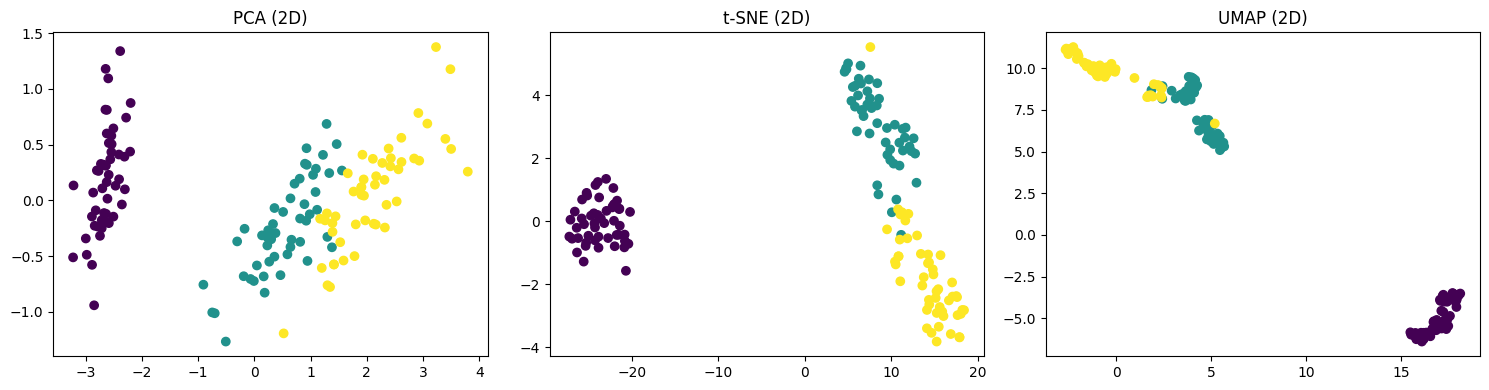

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 로드 (Iris 예시)
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data   # (150, 4) 형태: 꽃받침, 꽃잎 길이·너비
y = iris.target # (150,)  : 품종 라벨(0, 1, 2)

# 2. PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 3. t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# 4. UMAP
# (umap-learn 설치 필요할 수 있습니다 : pip install umap-learn)
from umap import UMAP
umap = UMAP(n_components=2, n_neighbors=15, random_state=42)
X_umap = umap.fit_transform(X)

# 5. 시각화 (PCA, t-SNE, UMAP 결과 비교)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y)
axes[0].set_title("PCA (2D)")

axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
axes[1].set_title("t-SNE (2D)")

axes[2].scatter(X_umap[:, 0], X_umap[:, 1], c=y)
axes[2].set_title("UMAP (2D)")

plt.tight_layout()
plt.show()


In [12]:
print("hello")

hello


=== One-Class SVM ===
이상치로 탐지된 샘플 개수: 6
이상치 인덱스: [ 15  32  41  60 118 131]

=== Isolation Forest ===
이상치로 탐지된 샘플 개수: 8
이상치 인덱스: [ 15  33  41  60 109 117 118 131]


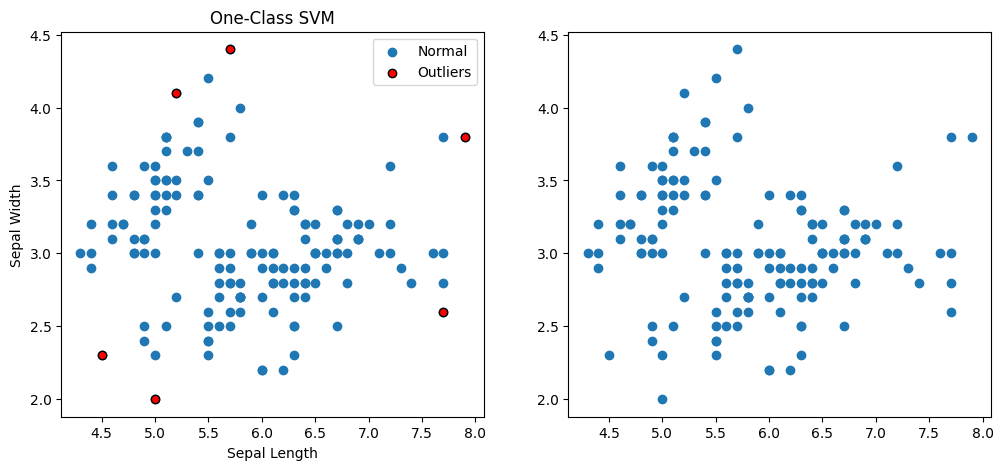

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
X_2d = X[:, :2]

from sklearn.svm import OneClassSVM
oc_svm = OneClassSVM(nu=0.05)
oc_svm.fit(X_2d)

y_pred_oc = oc_svm.predict(X_2d)


from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X_2d)
y_pred_if = iso_forest.predict(X_2d)

outliers_oc = np.where(y_pred_oc == -1)[0]
outliers_if = np.where(y_pred_if == -1)[0]

print("=== One-Class SVM ===")
print("이상치로 탐지된 샘플 개수:", len(outliers_oc))
print("이상치 인덱스:", outliers_oc)

print("\n=== Isolation Forest ===")
print("이상치로 탐지된 샘플 개수:", len(outliers_if))
print("이상치 인덱스:", outliers_if)

fig, axes = plt.subplots(1, 2, figsize = (12, 5))
axes[0].scatter(X_2d[:, 0], X_2d[:, 1], label = 'Normal')
axes[0].scatter(X_2d[outliers_oc, 0], X_2d[outliers_oc, 1],
                color='red', edgecolors='k', label='Outliers')
axes[0].set_title("One-Class SVM")
axes[0].set_xlabel("Sepal Length")
axes[0].set_ylabel("Sepal Width")
axes[0].legend()


axes[1].scatter(X_2d[:, 0], X_2d[:, 1], label='Normal')


In [17]:
from transformers import pipeline


qa_pipe = pipeline(
    "question-answering",
    model = "distilbert-base-uncased-distilled-squad"
)

# 2. 예시 지문(context)과 질문(question)
context = """
Hugging Face is a company that provides an open-source community and a platform of 
transformer models. Their Transformers library allows easy usage of state-of-the-art 
natural language processing models. They focus on facilitating accessibility and 
collaboration in the AI field.
"""

question = "What does Hugging Face provide?"

result = qa_pipe(question=question, context=context)
print(result)

NameError: name 'torch' is not defined